# Extract Forest Structure


In [1]:
import sys

sys.path.insert(0, "../../src")
from imports import *

init_notebook()

# Information from Alive Trees


## Load all alive trees


In [2]:
# Load NFI data
nfi_raw = get_final_nfi_data_for_analysis()

# Focus only on trees that were alive at first visit
nfi_raw = nfi_raw[nfi_raw["tree_state_1"] == "alive"]

# Number of trees and sites
print("\nSubsetting trees that were alive at first visit:")
print("\tNumber of trees:", nfi_raw.tree_id.nunique())
print("\tNumber of sites:", nfi_raw.idp.nunique())

# Keep only relevant columns
subset = nfi_raw[
    [
        "campagne_1",
        "idp",
        "tree_id",
        "genus_lat",
        "species_lat",
        "species_lat2",
        "tree_height_class",
        "tree_circumference_class",
        "espar",
        "espar_red",
        "tree_state_1",
        "tree_state_2",
        "tree_state_change",
        "lib",
        "c13_1",
        "c13_rel",
        "ba_1",
        "dbh_1",
        "ir5",
        "htot_final",  # Using mix of measured and RF-predicted values!
        "simplif",
    ]
]

# Fix formatting of columns
subset.loc[:, "genus_lat"] = subset["genus_lat"].astype(str)
subset.loc[:, "species_lat"] = subset["species_lat"].astype(str)

subset.loc[:, "lib"] = subset["lib"].fillna(0)
subset.loc[:, "htot_final"] = subset["htot_final"].fillna(0)

print(subset.shape)


Loading final NFI data for analysis... (output of python wrangling)
- Latest file is /Users/pascal/repos/padasch/ifn_analysis/data/final/nfi/nfi_ready_for_analysis.feather 
- Created on Thursday 2024-10-17, 12:32 which is 0 days ago.
  Number of trees:  687268
  Number of sites:  50012

Subsetting trees that were alive at first visit:
	Number of trees: 619496
	Number of sites: 50012
(619496, 21)


## Competition


### Site-Level


In [3]:
dom_genu = get_dominant_species(subset, "genus_lat")
dom_spec = get_dominant_species(subset, "species_lat")
dom_spec2 = get_dominant_species(subset, "species_lat2")
dom_htot = get_dominant_species(subset, "tree_height_class")
dom_circ = get_dominant_species(subset, "tree_circumference_class")
# dom_espa = get_dominant_species(subset, "espar")
# dom_espared = get_dominant_species(subset, "espar_red")
df_dom = (
    dom_genu.merge(dom_spec, on="idp", how="left")
    .merge(dom_spec2, on="idp", how="left")
    .merge(dom_htot, on="idp", how="left")
    .merge(dom_circ, on="idp", how="left")
)
df_dom

- Calculate dominant group for genus_lat based on basal area only...
- Calculate percentage of groups idp-genus_lat based on ba_1...
- Calculate dominant group for species_lat based on basal area only...
- Calculate percentage of groups idp-species_lat based on ba_1...
- Calculate dominant group for species_lat2 based on basal area only...
- Calculate percentage of groups idp-species_lat2 based on ba_1...
- Calculate dominant group for tree_height_class based on basal area only...
- Calculate percentage of groups idp-tree_height_class based on ba_1...
- Calculate dominant group for tree_circumference_class based on basal area only...
- Calculate percentage of groups idp-tree_circumference_class based on ba_1...


,idp,dom_genus_lat,ba_1_perc_of_genus_lat,dom_species_lat,ba_1_perc_of_species_lat,dom_species_lat2,ba_1_perc_of_species_lat2,dom_tree_height_class,ba_1_perc_of_tree_height_class,dom_tree_circumference_class,ba_1_perc_of_tree_circumference_class
0,500002,Quercus,96.538920,Quercus petraea subsp. petraea (Chêne sessile),96.538920,Quercus petraea,96.538920,25+,88.399722,large,96.538920
1,500008,Quercus,85.911753,Quercus petraea subsp. petraea (Chêne sessile),85.911753,Quercus petraea,85.911753,0-10,88.553725,small,100.000000
2,500012,Quercus,91.598373,Quercus robur var. robur (Chêne pédonculé),91.598373,Quercus robur,91.598373,20-25,64.697162,large,66.837366
3,500013,Fraxinus,72.835794,Fraxinus excelsior (Frêne commun),72.835794,Fraxinus excelsior,72.835794,25+,39.184856,large,72.835794
4,500042,Quercus,100.000000,Quercus petraea subsp. petraea (Chêne sessile),100.000000,Quercus petraea,100.000000,20-25,63.384232,large,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
50007,1354907,Pseudotsuga,99.674038,Pseudotsuga menziesii (Douglas),99.674038,Pseudotsuga menziesii,99.674038,25+,99.674038,large,93.090559
50008,1354910,Quercus,68.995114,Quercus robur var. robur (Chêne pédonculé),68.995114,Quercus robur,68.995114,15-20,50.980117,large,87.658810
50009,1354911,Quercus,68.783448,Quercus robur var. robur (Chêne pédonculé),68.783448,Quercus robur,68.783448,25+,90.106805,large,68.783448
50010,1354913,Picea,92.043507,Picea abies subsp. abies (Épicéa commun),92.043507,Picea abies,92.043507,25+,53.487403,large,71.954080


### Tree-Level


In [4]:
# Calculate competition metrics (~20 minutes)
df_comp = calculate_competition_metrics_mp(subset, tree_size_var="htot_final")

# Check whether tree belongs to dominant species
dom_spec2 = get_dominant_species(subset, "species_lat2")
df_dom_tree = pd.merge(
    subset[["idp", "tree_id", "species_lat2"]], dom_spec2, how="left", on="idp"
)
df_dom_tree["belongs_to_dom_spec"] = (
    df_dom_tree["species_lat2"] == df_dom_tree["dom_species_lat2"]
).astype(int)

df_dom_tree = df_dom_tree[["tree_id", "belongs_to_dom_spec"]]

 - Splitting df into 10 groups, grouped by idp


100%|██████████| 10/10 [14:36<00:00, 87.62s/it]


- Calculate dominant group for species_lat2 based on basal area only...
- Calculate percentage of groups idp-species_lat2 based on ba_1...


In [5]:
# Calculate mean dbh per site
df_dbh = (
    subset.groupby("idp")["dbh_1"]
    .mean()
    .reset_index()
    .rename(columns={"dbh_1": "mean_dbh"})
)

df_dbh = pd.merge(subset[["idp", "tree_id"]], df_dbh, how="left", on="idp")

# Calculate trees per site
df_trees = (
    subset.groupby("idp")["tree_id"]
    .count()
    .reset_index()
    .rename(columns={"tree_id": "num_trees"})
)

df_trees = df_trees.merge(df_dbh, how="left", on="idp")
df_trees

,idp,num_trees,tree_id,mean_dbh
0,500002,10,500002_1,0.444679
1,500002,10,500002_2,0.444679
2,500002,10,500002_3,0.444679
3,500002,10,500002_4,0.444679
4,500002,10,500002_5,0.444679
...,...,...,...,...
619491,1354931,28,1354931_25,0.159814
619492,1354931,28,1354931_26,0.159814
619493,1354931,28,1354931_27,0.159814
619494,1354931,28,1354931_28,0.159814


In [6]:
# Merge dataframes together
df_tree_tmp = df_trees.merge(df_comp, how="left", on="tree_id").merge(
    df_dom_tree, how="left", on="tree_id"
)

df_tree_tmp = move_vars_to_front(df_tree_tmp, ["tree_id", "idp"])

# Save dataframe
df_tree_tmp.to_feather(here("data/final/predictor_datasets/forest_competition.feather"))

df_tree_tmp

,tree_id,idp,num_trees,mean_dbh,competition_total,competition_larger,competition_larger_rel,competition_same_species,competition_same_species_rel,competition_other_species,competition_other_species_rel,belongs_to_dom_spec
0,500002_1,500002,10,0.444679,88.080937,68.126337,0.773452,85.032385,0.965389,3.048552,0.034611,1
1,500002_2,500002,10,0.444679,88.080937,50.924027,0.578150,85.032385,0.965389,3.048552,0.034611,1
2,500002_3,500002,10,0.444679,88.080937,24.045543,0.272994,85.032385,0.965389,3.048552,0.034611,1
3,500002_4,500002,10,0.444679,88.080937,0.000000,0.000000,85.032385,0.965389,3.048552,0.034611,1
4,500002_5,500002,10,0.444679,88.080937,61.692037,0.700402,85.032385,0.965389,3.048552,0.034611,1
...,...,...,...,...,...,...,...,...,...,...,...,...
619491,1354931_25,1354931,28,0.159814,43.093853,38.081636,0.883691,7.009014,0.162645,36.084838,0.837355,0
619492,1354931_26,1354931,28,0.159814,43.093853,0.000000,0.000000,8.057466,0.186975,35.036387,0.813025,0
619493,1354931_27,1354931,28,0.159814,43.093853,37.160180,0.862308,7.009014,0.162645,36.084838,0.837355,0
619494,1354931_28,1354931,28,0.159814,43.093853,26.122559,0.606178,28.027373,0.650380,15.066480,0.349620,1


## Gini Inequality


In [7]:
df_gini = calculate_gini_coefficient(subset, "idp", "ba_1").sort_values("gini_ba_1")
df_gini.sort_values("gini_ba_1", ascending=False)
df_gini.to_feather("../../data/final/predictor_datasets/forest_gini.feather")


Calculate Gini-Coefficient per site for ba_1


100%|██████████| 50012/50012 [00:05<00:00, 8940.65it/s] 


## Biodiversity Indeces


Calculate Simpson Diversity Index for each site based on species_lat2...


100%|██████████| 50012/50012 [00:12<00:00, 3861.69it/s]


Calculate Shannon Diversity Index for each site based on species_lat2...


/Users/pascal/repos/padasch/ifn_analysis/notebooks/01_process_nfi_data/../../src/utilities.py:1730: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([site_var, species_var])[tree_var].count().reset_index(name="count")
/Users/pascal/repos/padasch/ifn_analysis/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='biodiv_simpson_score_species_lat2', ylabel='biodiv_shan_species_lat2'>

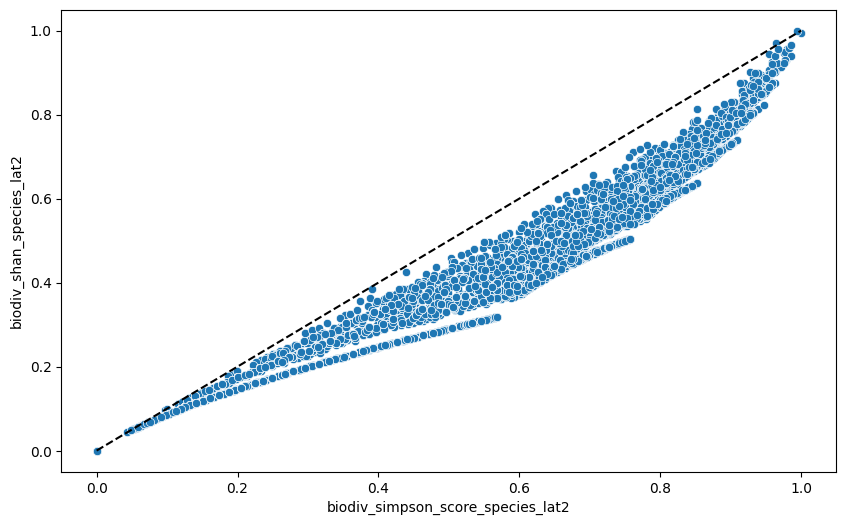

In [8]:
# # ! Compare the two diversity indices

pick_metric = "species_lat2"

simpson = calculate_simpson_diversity(subset, "idp", pick_metric)
shannon = calculate_shannon_diversity(subset, "idp", "tree_id", pick_metric)

# Merge the two diversity indices
diversity = pd.merge(simpson, shannon, on="idp", how="left")
diversity

# Scale each index to a range of 0-1
diversity[f"biodiv_simpson_score_{pick_metric}"] = (
    diversity[f"biodiv_simpson_score_{pick_metric}"]
    - diversity[f"biodiv_simpson_score_{pick_metric}"].min()
) / (
    diversity[f"biodiv_simpson_score_{pick_metric}"].max()
    - diversity[f"biodiv_simpson_score_{pick_metric}"].min()
)

diversity[f"biodiv_shan_{pick_metric}"] = (
    diversity[f"biodiv_shan_{pick_metric}"]
    - diversity[f"biodiv_shan_{pick_metric}"].min()
) / (
    diversity[f"biodiv_shan_{pick_metric}"].max()
    - diversity[f"biodiv_shan_{pick_metric}"].min()
)

# Plot the diversity indices
fig, ax = plt.subplots(figsize=(10, 6))

# Add 1 to 1 line
ax.plot([0, 1], [0, 1], color="black", linestyle="--")

sns.scatterplot(
    data=diversity,
    x=f"biodiv_simpson_score_{pick_metric}",
    y=f"biodiv_shan_{pick_metric}",
    ax=ax,
)

In [9]:
# Calculate number of species per site
df_spec_per_site = subset.groupby("idp")["species_lat2"].nunique().reset_index()
df_spec_per_site = df_spec_per_site.rename(columns={"species_lat2": "num_species"})

# Clean names
simpson = simpson.rename(
    columns={"biodiv_simpson_score_species_lat2": "simpson_species"}
)[["idp", "simpson_species"]]
shannon = shannon.rename(columns={"biodiv_shan_species_lat2": "shannon_species"})[
    ["idp", "shannon_species"]
]

df_diversity = pd.merge(simpson, shannon, on="idp", how="left").merge(
    df_spec_per_site, on="idp", how="left"
)
df_diversity

df_diversity.to_feather(
    "../../data/final/predictor_datasets/forest_biodiversity.feather"
)

## Self-Thinning Line


In [10]:
# LOAD SUBSET FROM ABOVE!
# ! Number of trees per hectare


# Functions
def trees_per_hectare(count_trees, radius):
    area_ha = (radius / 100) ** 2 * 3.14159
    trees_per_ha = count_trees / area_ha
    return trees_per_ha


# Inputs
radius_small = 6
radius_medium = 9
radius_large = 15

# Group by 'idp' and 'tree_circumference_class', then count the occurrences
counts = (
    subset.groupby(["idp", "tree_circumference_class"], observed=False)
    .size()
    .unstack(fill_value=0)
)

# Calculate trees per hectare for each circumference class
trees_per_hectare_small = trees_per_hectare(counts["small"], radius_small)
trees_per_hectare_medium = trees_per_hectare(counts["medium"], radius_medium)
trees_per_hectare_large = trees_per_hectare(counts["large"], radius_large)

# Calculate total trees per hectare for each site
total_trees_per_hectare = (
    trees_per_hectare_small + trees_per_hectare_medium + trees_per_hectare_large
)

# Create the output DataFrame
df_out = pd.DataFrame(
    {"idp": counts.index, "num_trees_per_ha": total_trees_per_hectare}
).reset_index(drop=True)

# ! DBH per plot
# Calculate mean DBH normal
df_meandbh = subset.groupby("idp")["dbh_1"].mean().reset_index(name="dbh_1")
df_meandbh["dbh_1"] = df_meandbh["dbh_1"] * 100

# Calculate mean DBH squared
subset["dbh_1_sq"] = (subset["dbh_1"] * 100) ** 2
df_meandbh2 = subset.groupby("idp")["dbh_1_sq"].mean().reset_index(name="dbh_1_sq")
df_meandbh2["dbh_1_sq"] = df_meandbh2["dbh_1_sq"] ** 0.5

df_meandbh = pd.merge(df_meandbh, df_meandbh2, on="idp", how="left")

# Attach variables directly to be used in the model


# ! Merge them
df_stl = pd.merge(df_meandbh, df_out, on="idp", how="left")

# ! Attach dominant species and its "purity"
df_stl = df_stl.merge(
    get_dominant_species(subset, "species_lat2"), how="left", on="idp"
)

df_stl

/var/folders/39/534x_msj7sl1kcxj2mg109x40000gn/T/ipykernel_3803/1616637168.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["dbh_1_sq"] = (subset["dbh_1"] * 100) ** 2


- Calculate dominant group for species_lat2 based on basal area only...
- Calculate percentage of groups idp-species_lat2 based on ba_1...


,idp,dbh_1,dbh_1_sq,num_trees_per_ha,dom_species_lat2,ba_1_perc_of_species_lat2
0,500002,44.467891,46.925722,240.893982,Quercus petraea,96.538920
1,500008,10.528712,10.698680,1149.453338,Quercus petraea,85.911753
2,500012,25.146481,28.319087,807.564653,Quercus robur,91.598373
3,500013,19.381535,24.929759,1319.611729,Fraxinus excelsior,72.835794
4,500042,49.338032,49.562597,70.735590,Quercus petraea,100.000000
...,...,...,...,...,...,...
50007,1354907,45.083290,47.389895,226.746864,Pseudotsuga menziesii,99.674038
50008,1354910,37.361092,39.194703,387.080868,Quercus robur,68.995114
50009,1354911,26.709093,30.516199,602.431442,Quercus robur,68.783448
50010,1354913,32.117468,35.010625,684.170346,Picea abies,92.043507


41% of all sites have a purity of at least 90%


count    50012.000000
mean        78.305762
std         20.383095
min         16.737513
25%         60.938856
50%         82.620704
75%         99.656728
max        100.000000
Name: ba_1_perc_of_species_lat2, dtype: float64

<Axes: >

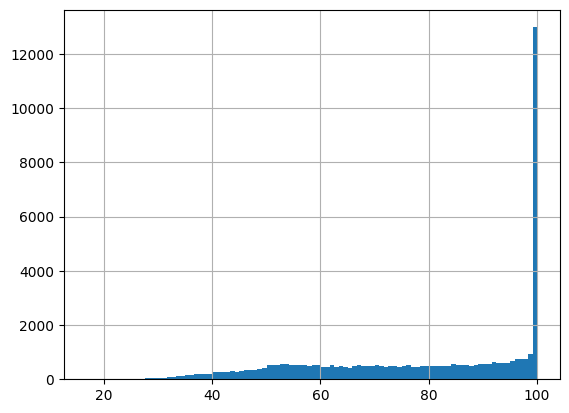

In [11]:
above_90percent = (
    df_stl.query("ba_1_perc_of_species_lat2 >= 90").shape[0] / df_stl.shape[0] * 100
)
print(f"{round(above_90percent)}% of all sites have a purity of at least 90%")
display(df_stl.ba_1_perc_of_species_lat2.describe())
df_stl.ba_1_perc_of_species_lat2.hist(bins=100)

In [12]:
# Load empirical models for self-thinning lines
stl_lin = pd.read_excel(
    "../../docs/charru2012significant_self-thinning-lines.xlsx",
    sheet_name="Table 2 - Linear Models",
)

stl_cur = (
    pd.read_excel(
        "../../docs/charru2012significant_self-thinning-lines.xlsx",
        sheet_name="Table 5 - Curvilinear Models",
    )
    .dropna()
    .reset_index(drop=True)
)

display(stl_lin)
display(stl_cur)

,species_lat2,species_eng,intercept,ln_D
0,Quercus pubescens,Pubescent oak,12.270000,-1.809000
1,Quercus robur,Pedunculate oak,12.138000,-1.758000
2,Quercus petraea,Sessile oak,12.681000,-1.911000
3,Fagus sylvatica,Common beech,12.950000,-1.941000
4,Pinus sylvestris,Scots pine,11.993000,-1.615000
5,Pinus halepensis,Aleppo pine,12.512000,-1.881000
6,Pinus nigra,Corsican pine,12.104000,-1.653000
7,Pinus pinaster,Maritime pine,11.982000,-1.711000
8,Abies alba,Norway spruce,13.086000,-1.878000
9,Picea abies,Silver fir,12.621000,-1.779000


,species_lat2,species_eng,intercept,ln_D,ln_D2
0,Fagus sylvatica,Common beech,9.790000,0.000000,-0.296000
1,Pinus sylvestris,Scots pine,2.279000,4.701000,-1.023000
2,Pinus halepensis,Aleppo pine,9.575000,0.000000,-0.299000
3,Pinus pinaster,Maritime pine,9.307000,0.000000,-0.272000
4,Abies alba,Norway spruce,4.700000,3.000000,-0.718000
5,Picea abies,Silver fir,10.043000,0.000000,-0.287000
6,Pseudotsuga menziesii,Douglas fir,0.607000,5.192000,-1.009000
7,Average,Average,6.614429,1.841857,-0.557714


In [13]:
min_purity = 50  # Minimum percentage of ba to be occupied by one species
df_stl["max_N_ln"] = np.nan
df_stl["formula"] = ""
df_stl["model"] = ""

avg_int = stl_lin.query("species_lat2 == 'Average'")["intercept"].values[0]
avg_slo = stl_lin.query("species_lat2 == 'Average'")["ln_D"].values[0]

for i in tqdm(range(df_stl.shape[0])):
    # Get dominant species of plot
    s = df_stl.at[i, "dom_species_lat2"]
    dbh_sq = df_stl.at[i, "dbh_1_sq"]
    purity = df_stl.at[i, "ba_1_perc_of_species_lat2"]
    # If purity is not achieved, then go for averaged linear model
    if purity < min_purity:
        df_stl.at[i, "max_N_ln"] = avg_int + avg_slo * math.log(dbh_sq)
        df_stl.at[i, "formula"] = f"{avg_int} + {avg_slo} * math.log({dbh_sq})"
        df_stl.at[i, "model"] = "avg_low_purity"
    else:
        # If purity is achieved, check if curvilinear model is available:
        if s in stl_cur.species_lat2.unique():
            # Get parameters
            inter = stl_cur.query("species_lat2 == @s")["intercept"].values[0]
            slope_1 = stl_cur.query("species_lat2 == @s")["ln_D"].values[0]
            slope_2 = stl_cur.query("species_lat2 == @s")["ln_D2"].values[0]
            # Calculate max ln(N)
            df_stl.at[i, "max_N_ln"] = (
                inter + slope_1 * math.log(dbh_sq) + slope_2 * math.log(dbh_sq) ** 2
            )
            df_stl.at[i, "formula"] = (
                f"{inter} + {slope_1} * math.log({dbh_sq}) + {slope_2} * math.log({dbh_sq}) ** 2"
            )
            df_stl.at[i, "model"] = "curvilinear"
            # If curvilinear model is not available check if linear model for species is available
        elif s in stl_lin.species_lat2.unique():
            # Get parameters
            inter = stl_lin.query("species_lat2 == @s")["intercept"].values[0]
            slope_1 = stl_lin.query("species_lat2 == @s")["ln_D"].values[0]
            # Calculate max ln(N)
            df_stl.at[i, "max_N_ln"] = inter + slope_1 * math.log(dbh_sq)
            df_stl.at[i, "formula"] = f"{inter} + {slope_1} * math.log({dbh_sq})"
            # If linear model is not available for species, take average value
            df_stl.at[i, "model"] = "linear"
        else:
            df_stl.at[i, "max_N_ln"] = avg_int + avg_slo * math.log(dbh_sq)
            df_stl.at[i, "formula"] = f"{avg_int} + {avg_slo} * math.log({dbh_sq})"
            df_stl.at[i, "model"] = "avg_no_species"

# When done, take exponential of max_N to get number of trees
df_stl["max_N"] = df_stl["max_N_ln"].apply(math.exp)
# Add percentage of current / max N trees
df_stl["carrying_capacity"] = df_stl["num_trees_per_ha"] / df_stl["max_N"]
# Add log ba
df_stl["dbh_1_sq_log"] = np.log(df_stl["dbh_1_sq"])
# Show df
df_stl

100%|██████████| 50012/50012 [00:37<00:00, 1344.11it/s]


,idp,dbh_1,dbh_1_sq,num_trees_per_ha,dom_species_lat2,ba_1_perc_of_species_lat2,max_N_ln,formula,model,max_N,carrying_capacity,dbh_1_sq_log
0,500002,44.467891,46.925722,240.893982,Quercus petraea,96.538920,5.326390,12.681 + -1.911 * math.log(46.92572233026671),linear,205.694163,1.171127,3.848566
1,500008,10.528712,10.698680,1149.453338,Quercus petraea,85.911753,8.151700,12.681 + -1.911 * math.log(10.698680375028907),linear,3469.271495,0.331324,2.370120
2,500012,25.146481,28.319087,807.564653,Quercus robur,91.598373,6.260064,12.138 + -1.758 * math.log(28.319086814730728),linear,523.252255,1.543356,3.343536
3,500013,19.381535,24.929759,1319.611729,Fraxinus excelsior,72.835794,6.681188,12.406363636363636 + -1.7801818181818183 * mat...,avg_no_species,797.265804,1.655172,3.216062
4,500042,49.338032,49.562597,70.735590,Quercus petraea,100.000000,5.221915,12.681 + -1.911 * math.log(49.56259719245518),linear,185.288695,0.381759,3.903236
...,...,...,...,...,...,...,...,...,...,...,...,...
50007,1354907,45.083290,47.389895,226.746864,Pseudotsuga menziesii,99.674038,5.618554,0.607 + 5.192 * math.log(47.38989513246869) + ...,curvilinear,275.490619,0.823066,3.858409
50008,1354910,37.361092,39.194703,387.080868,Quercus robur,68.995114,5.688704,12.138 + -1.758 * math.log(39.19470323206602),linear,295.510343,1.309872,3.668542
50009,1354911,26.709093,30.516199,602.431442,Quercus robur,68.783448,6.128703,12.138 + -1.758 * math.log(30.51619886795174),linear,458.840679,1.312943,3.418258
50010,1354913,32.117468,35.010625,684.170346,Picea abies,92.043507,6.414557,10.043 + 0.0 * math.log(35.01062544790594) + -...,curvilinear,610.670216,1.120360,3.555652


In [14]:
# Some stats
display(df_stl.describe())
display(df_stl.groupby("model")["max_N"].describe())
display(df_stl.value_counts("model", normalize=True))

,idp,dbh_1,dbh_1_sq,num_trees_per_ha,ba_1_perc_of_species_lat2,max_N_ln,max_N,carrying_capacity,dbh_1_sq_log
count,5.001200e+04,50012.000000,50012.000000,50012.000000,50012.000000,50012.000000,50012.000000,50012.000000,50012.000000
mean,9.078746e+05,26.292012,28.634175,738.902839,78.305762,6.565872,1048.880843,0.986517,3.248772
std,2.504253e+05,12.012467,12.707930,575.009309,20.383095,0.867098,1052.353516,0.659916,0.477439
min,5.000020e+05,7.512113,7.512113,14.147118,16.737513,2.223972,9.243978,0.012597,2.016517
25%,7.002260e+05,16.790846,18.691531,308.878743,60.938856,5.920387,372.555692,0.495372,2.928071
50%,9.079290e+05,24.765393,27.692452,603.413880,82.620704,6.476993,650.013131,0.883277,3.321160
75%,1.115400e+06,33.798722,36.974994,1019.378447,99.656728,7.167925,1297.149725,1.355386,3.610242
max,1.354931e+06,157.404239,157.404239,5688.320363,100.000000,8.856425,7019.346506,7.530376,5.058817


,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
avg_low_purity,5633.0,1060.449948,923.903940,125.993985,447.759636,709.592349,1327.581354,5938.405106
avg_no_species,12454.0,1607.362258,1430.875375,32.090480,526.069430,1019.699380,2326.660906,6745.271679
curvilinear,15298.0,827.934306,715.410656,9.243978,353.054180,594.098548,1064.102218,7019.346506
linear,16627.0,829.932375,843.259844,25.651428,307.003020,507.104137,995.281216,6818.783382


model
linear            0.332460
curvilinear       0.305887
avg_no_species    0.249020
avg_low_purity    0.112633
Name: proportion, dtype: float64

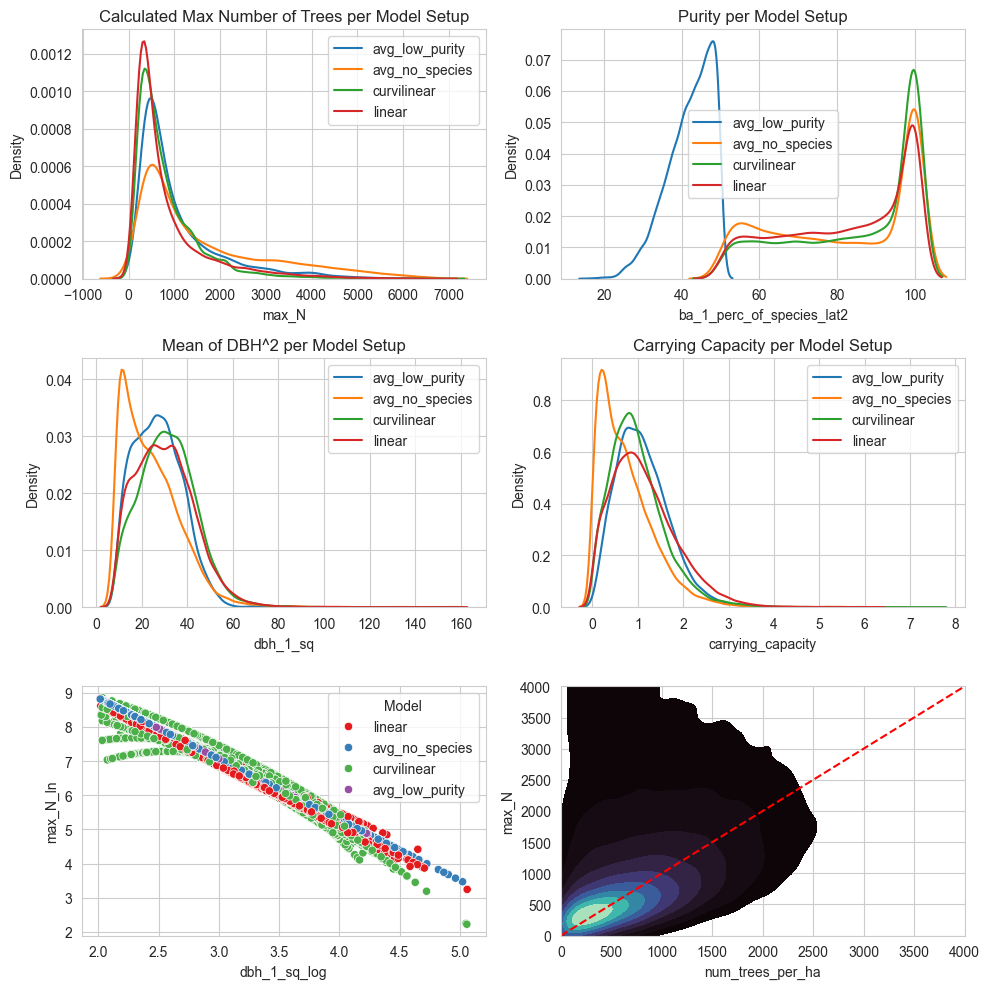

In [15]:
# Ignore infinity warning, just future changes warning
warnings.simplefilter(action="ignore", category=FutureWarning)

# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Plot density lines for quality control
# max N ~ Model
for model, group in df_stl.groupby("model"):
    sns.kdeplot(
        group["max_N"], ax=axes[0, 0], label=model
    )  # Adjust other parameters as needed
axes[0, 0].set_title("Calculated Max Number of Trees per Model Setup")
axes[0, 0].legend()

# Purity ~ Model
for model, group in df_stl.groupby("model"):
    sns.kdeplot(
        group["ba_1_perc_of_species_lat2"], ax=axes[0, 1], label=model
    )  # Adjust other parameters as needed
axes[0, 1].set_title("Purity per Model Setup")
axes[0, 1].legend()

# DBH ~ Model
for model, group in df_stl.groupby("model"):
    sns.kdeplot(
        group["dbh_1_sq"], ax=axes[1, 0], label=model
    )  # Adjust other parameters as needed
axes[1, 0].set_title("Mean of DBH^2 per Model Setup")
axes[1, 0].legend()

# CC ~ Model
for model, group in df_stl.groupby("model"):
    sns.kdeplot(
        group["carrying_capacity"], ax=axes[1, 1], label=model
    )  # Adjust other parameters as needed
axes[1, 1].set_title("Carrying Capacity per Model Setup")
axes[1, 1].legend()

# STL - Scatterplot
sns.scatterplot(
    data=df_stl,
    x="dbh_1_sq_log",
    y="max_N_ln",
    hue="model",
    palette="Set1",
    ax=axes[2, 0],
)
axes[2, 0].legend(title="Model", loc="upper right")

# Estimated Max versus Current
sns.kdeplot(
    data=df_stl,
    x="num_trees_per_ha",
    y="max_N",
    fill=True,
    thresh=0.05,
    levels=10,
    cmap="mako",
    legend=True,
    ax=axes[2, 1],
)
axes[2, 1].plot([0, 4000], [0, 4000], color="red", linestyle="--")
axes[2, 1].set_xlim([0, 4000])
axes[2, 1].set_ylim([0, 4000])

plt.tight_layout()
plt.show()

In [16]:
df_stl[["idp", "carrying_capacity"]].to_feather(
    "../../data/final/predictor_datasets/forest_carrying_capacity.feather"
)